# Predicting a car's market price by k-nearest neighbors algorithm
In this guided project, we'll practice the machine learning workflow to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. We can read more about the data set from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/automobile). 

## Introduction to dataset

In [1]:
#import and see the first 5 rows of the dataset
import pandas as pd
import numpy as np
pd.options.display.max_columns = 99


In [2]:
#column names don't match the ones in the dataset documentation. So, we need to match
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names=cols)
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale the values in the numeric columns so they all range from 0 to 1.

In [3]:
cars["normalized-losses"]=cars["normalized-losses"].replace("?",np.nan)
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols].copy()

In [5]:
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


## Data Cleaning
Now we choose numeric columns which we will work on our project. Let's start cleaning the data.

In [7]:
#As we did for normalized-losses column, we replace all ? for np.nan for the dataset.
numeric_cars = numeric_cars.replace('?', np.nan)

In [8]:
#Change the datatype of all columns to float and see missing values
numeric_cars = numeric_cars.astype(float)
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Since there is 4 missing value in price which we want to predict, lets remove all rows with missing price values.

In [9]:
numeric_cars=numeric_cars.dropna(subset=["price"])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

For other missing values, we will fill it with mean values.

In [10]:
# Replace missing values in other columns using column means.
numeric_cars=numeric_cars.fillna(numeric_cars.mean())

In [11]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now, all columns have their values filled. We will normalize all values in dataset through min-max normalization so value range from 0 to 1.

In [12]:
#Separate the price column first
price_list = numeric_cars["price"]
numeric_cars = (numeric_cars-numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
#set back the price
numeric_cars["price"]= price_list

In [13]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model
Now we got all data normalized except for price column. And we also cleaned the data so that there is no missing value that will cause error in predictive modeling. We will create function that encapsulates the training and simple validation process.

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of rows in data frame
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df)/2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df=rand_df[:last_train_row]
    test_df=rand_df[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[training_col]], train_df[target_col])
    
    # Make predictions using model.
    prediction = knn.predict(test_df[[training_col]])
    
    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], prediction)
    rmse = np.sqrt(mse)
    
    return rmse

rmse_results = {}

training_col = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in training_col:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val
    
# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series=pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

engine-size column performed the best and having the loweset rmse value using default k value which is 5. For our next step, we will modify the function above to take different k values and see the difference.

In [15]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885

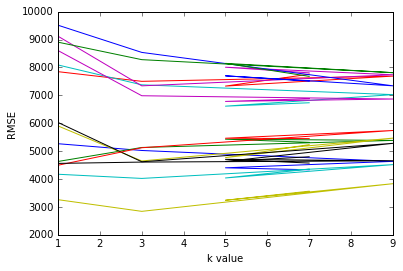

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

We can see that still engine-size performed the best but it worked better with the k value of 3 instead of default value of 5. Now, we will modify the fuction that can take several columns together.

## Multivariate Model

In [17]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


Now we got the column index sorted in performance we can use for figuring out performance of multi features.

In [18]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_col])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(sorted_features[:nr_best_feats],'price',numeric_cars)

k_rmse_results

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805},
 '6 best features': {5: 3478.510890118539}}

We can see RMSE value goes up from using 3 features then fluctuate between 3400 and 3500.

## Hyperparameter Tuning
Let's now optimize the model that performed the best in the previous step.

In [19]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 26)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_col])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(sorted_features[:nr_best_feats],'price',numeric_cars)

k_rmse_results

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579,
  25: 4955.892429427362},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.21649

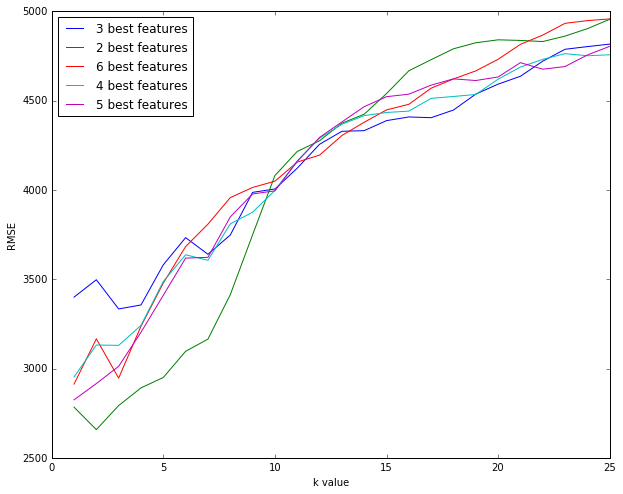

In [22]:
plt.figure(figsize=(10,8))
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc='upper left')

## Conclusion
The 3 best features that perform the best to predict price:
    1. engine-size
    2. horsepower
    3. curbweight
The 3 worst features:
    1.stroke
    2.peak-rpm
    3.height
    
From the RMSE values in the plot above, we can see that 2 best features performed really well in minimizing the RMSE value however, having too small number of features, we can lead our project to have big bias. So, it will be safe to have 3 or 4 best features to predict the price.

Our future step can be using k-fold validation to have better accuracy than a simple train/test validation we performed above.

## K-Fold validation

In [24]:
from sklearn.model_selection import cross_val_score, KFold
folds_values = [f for f in range(2,10)]
k_folds_dict = {}

for folds in folds_values:
    kf = KFold(folds, shuffle=True, random_state=1)
    knn = KNeighborsRegressor()
    mses = cross_val_score(knn,
                         numeric_cars[sorted_features],
                         numeric_cars['price'],
                         scoring='neg_mean_squared_error',
                         cv=kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmse = np.mean(rmses)
    k_folds_dict[folds] = avg_rmse
    print(str(folds), 'folds:', 'average RMSE is',str(avg_rmse))  

2 folds: average RMSE is 4010.0951980581976
3 folds: average RMSE is 3634.0267054987667
4 folds: average RMSE is 3492.4826978756364
5 folds: average RMSE is 3421.3742344782236
6 folds: average RMSE is 3306.311928423313
7 folds: average RMSE is 3293.3169974903317
8 folds: average RMSE is 3286.2177372861543
9 folds: average RMSE is 3241.6054021254004


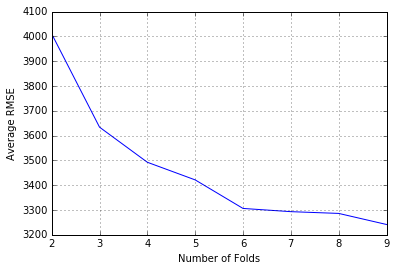

In [25]:
lists = sorted(k_folds_dict.items()) 

x, y = zip(*lists)
plt.xlabel('Number of Folds')
plt.ylabel('Average RMSE')
plt.grid(True)
plt.plot(x, y)

The finding suggests that the optimal number of fold is 9.

In [27]:
nn_value = [k for k in range(1,11)]
k_neighbor_dict = {}

for k in nn_value:

    kf = KFold(n_splits=9, shuffle=True, random_state=1)
    knn = KNeighborsRegressor(n_neighbors=k)
    mses = cross_val_score(knn,
                         numeric_cars[sorted_features],
                         numeric_cars['price'],
                         scoring='neg_mean_squared_error',
                         cv=kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmse = np.mean(rmses)
    k_neighbor_dict[k] = avg_rmse
    print(str(k), 'k:', 'average_rmse is', str(avg_rmse))

1 k: average_rmse is 2455.211009291545
2 k: average_rmse is 2643.220408542332
3 k: average_rmse is 2892.3709935608103
4 k: average_rmse is 3143.4340977671245
5 k: average_rmse is 3241.6054021254004
6 k: average_rmse is 3453.557684096738
7 k: average_rmse is 3647.002022748658
8 k: average_rmse is 3789.214591225179
9 k: average_rmse is 3881.369673115698
10 k: average_rmse is 3979.408730773547


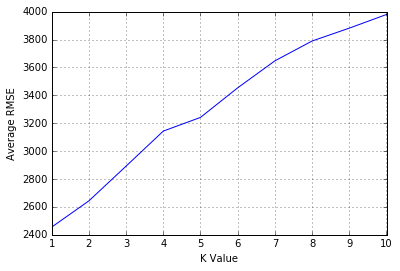

In [28]:
lists = sorted(k_neighbor_dict.items()) 

x, y = zip(*lists)
plt.xlabel('K Value')
plt.ylabel('Average RMSE')
plt.grid(True)
plt.plot(x, y)

As expected, the optimal number of k-nearest neighbor is 1 when the number of folds is 9.

In [29]:
top_features_dict = {}

for n in range(1,14):

    kf = KFold(n_splits=6, shuffle=True, random_state=1)
    knn = KNeighborsRegressor(n_neighbors=1)
    mses = cross_val_score(knn,
                        numeric_cars[sorted_features[:n]],
                        numeric_cars['price'],
                        scoring='neg_mean_squared_error',
                        cv=kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmse = np.mean(rmses)
    top_features_dict[n] = avg_rmse
    print(str(n), 'best features folds: average RMSE is', str(avg_rmse))

1 best features folds: average RMSE is 3931.265204700127
2 best features folds: average RMSE is 3065.693779742312
3 best features folds: average RMSE is 3028.991456774396
4 best features folds: average RMSE is 2622.2819111587946
5 best features folds: average RMSE is 2538.848736410437
6 best features folds: average RMSE is 2500.1118724761914
7 best features folds: average RMSE is 2470.9586747539565
8 best features folds: average RMSE is 2586.34778738865
9 best features folds: average RMSE is 2629.2680249410982
10 best features folds: average RMSE is 2670.790203117891
11 best features folds: average RMSE is 2663.832412213919
12 best features folds: average RMSE is 2573.786627308365
13 best features folds: average RMSE is 2783.968814696634


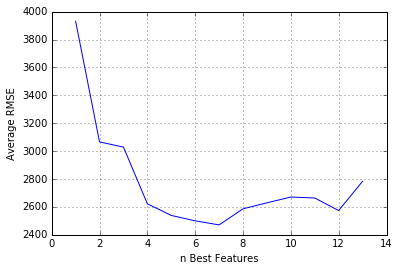

In [30]:
lists = sorted(top_features_dict.items()) 

x, y = zip(*lists)
plt.xlabel('n Best Features')
plt.ylabel('Average RMSE')
plt.grid(True)
plt.plot(x, y)

The finding unveils that the optimal n-best features is 7, when nearest neighbor is 1 and fold is 9.

## Second Conclusions

Based on the input values from the dataset, we conclude that the optimal value are following:

k-nearest neighbors: 1
number of folds: 9
n-best features: 7

The RMSE is at the lowest when value of k-nearest neighbor is 1 when other variables are hold constant, which suggests that the variance between data is low.